# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [13]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Write your code here to read the data
df = pd.read_csv('/content/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
#There are 1898 rows and 9 coloumns present in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Order_id, Customer_id, cost_of_the_order, food_preparation_time and delivery_times are numeric and restaurant_name, cuisine_type, day_of_the_week, rating are text (categorical) fields.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: isnull() method will return true(1) for each cell in the data if the value is missing. By adding all the true(1)/false(0) values from each cell in a column and if the sum is 0 then there is no cell in that column has missing value. Based on the above command, none of the cells in the data has missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
#Minimum food preparation time: 20.0
#Average food preparation time: 27.37
#Maximum food preparation time: 35.0

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
df['rating'].value_counts()



,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
#There are 736 orders that are not rated.
#588 orders are rated 5.
#386 orders are rated 4.
#188 orders are rated 3.
# no orders are rated 2 or below.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

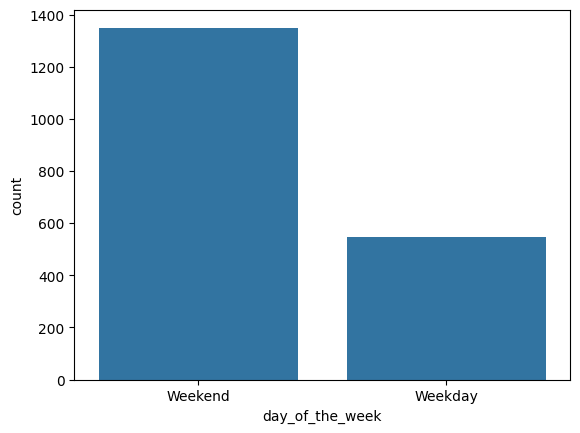

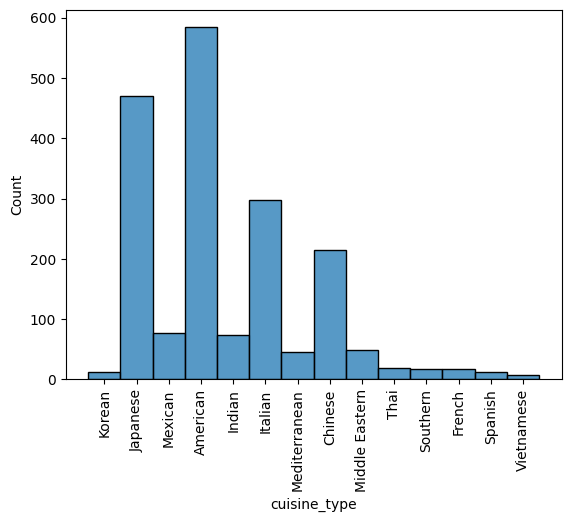

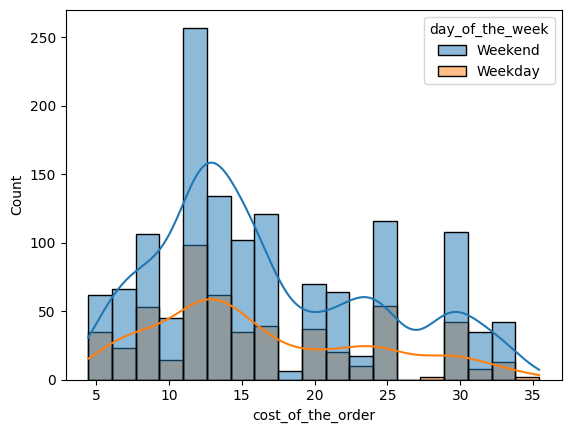

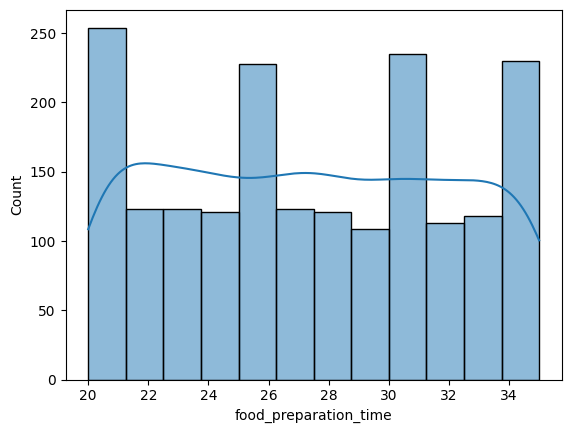

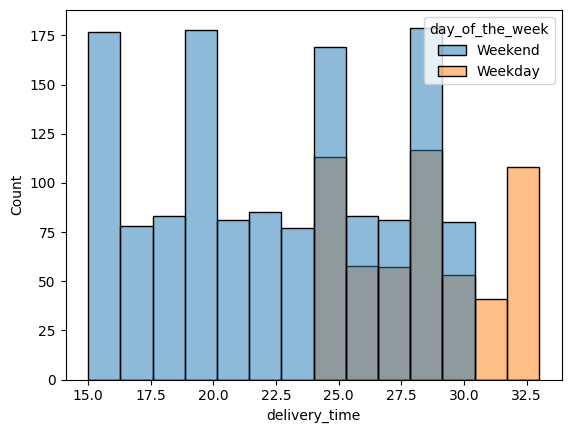

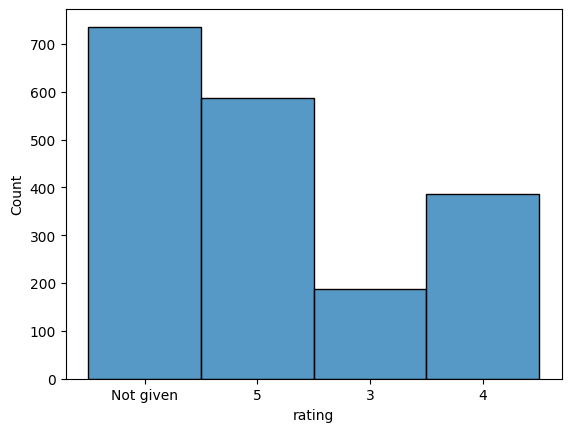

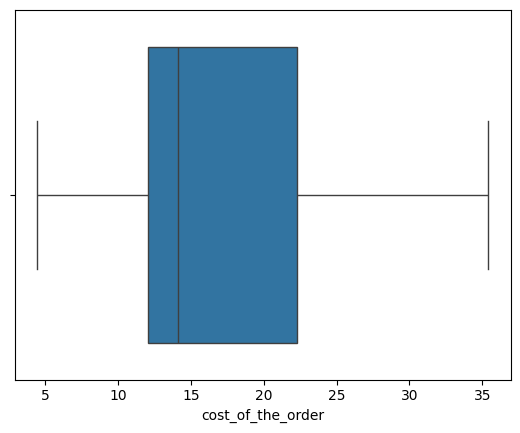

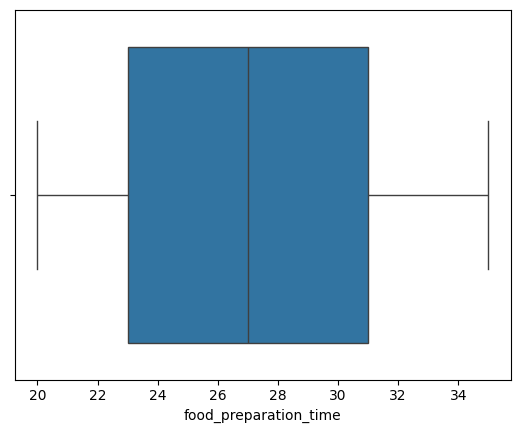

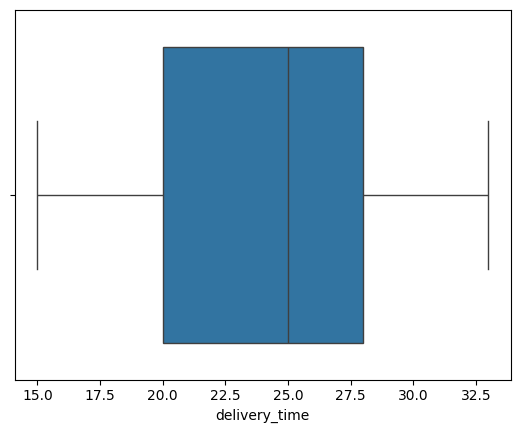

In [10]:
# Write the code here

sns.countplot(data=df, x='day_of_the_week')
plt.show()
sns.histplot(data=df, x='cuisine_type' )
plt.xticks(rotation=90)
plt.show()
sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week',kde=True)
plt.show()
sns.histplot(data=df, x='food_preparation_time',kde=True)
plt.show()
sns.histplot(data=df, x='delivery_time', hue='day_of_the_week')
plt.show()
sns.histplot(data=df, x='rating')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()



#Observations:
#1. More orders are placed on Weekends than on weekdays.(countplot - day_of_the_week)
#2. American, Japanese, Italian and Chinese are the top 4 cuisines. (hist - cuisine_type)
#3. cost of most orders are between 11-16 dollars (hist - cost of the order)
#4. Majority of the oders were prepared with in 20 mins, followed by 31, 34 and 26 mins. (hist - food_preparation_time)
#5. Most of the orders were delivered with in 28 mins, followed by 25, 20 and 15 mins. Weekend deliveries are much faster than the weekday deliveries (hist - delivery time and hue - day of the week)
#6. most orders are not rated followed by 5 star, 4 star and 3stars. There are no orders rated less than 3 (hist - rating)
#7. 50% of the orders are between 5-14 dollars. The box plot on cost_of_the_order is right skewed, that means there are very few orders with higher cost. (boxplot - cost_of_the_order)
#8. there are no outliers in food_preperation_times or delivery_times. All the orders are preparad and delivered with in certain range of times. (box plots by delivery_time, food_preparation_time)






### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [11]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
# Shake Shack (219),
#The Meatball Shop (132),
#Blue Ribbon Sushi (119),
#Blue Ribbon Fried Chicken (96),
#Parm (68) are the top 5 restaurants in terms of the number of orders received.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:
# American cuisine is ordered the most on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [13]:
# Write the code here
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100



29.24130663856691

#### Observations:
#29.24% of the orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [14]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
# The mean delivery time is 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [15]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
#Below customers are the popular customers that can be offered 20% discount vouchers.
#Customer Ids: 52832, 47440, 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


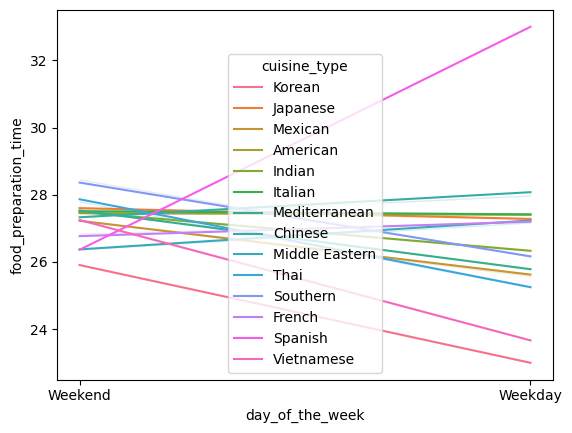

In [16]:
# Write the code here
sns.lineplot(data = df , x = 'day_of_the_week' , y = 'food_preparation_time', errorbar=('ci', False), hue='cuisine_type');

Observations: Most of the orders were prepared much quicker on the weekdays than on weekends, except for Spanish Cuisine orders.

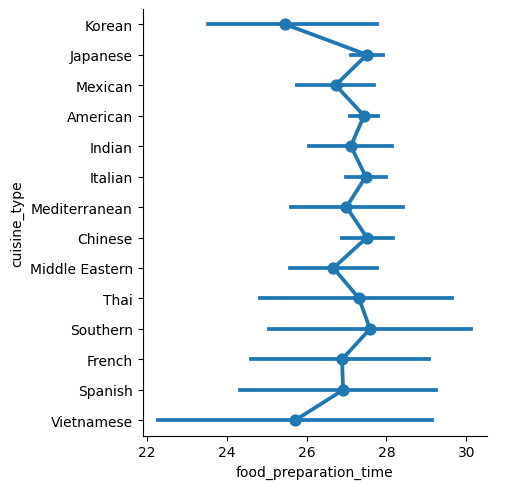

In [17]:
sns.catplot(data = df , x = 'food_preparation_time' , y = 'cuisine_type', kind='point');

#Observations:
#Vietnamese and Korean cuisine restaurants don't have consistency in preparing their orders.

<Figure size 10000x1000 with 0 Axes>

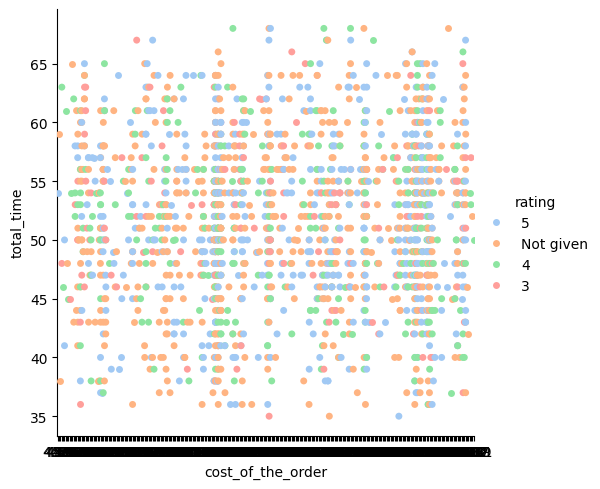

In [18]:
#sns.catplot(data = df , x = 'delivery_time' , y = 'cuisine_type', kind='point');
plt.figure(figsize=(100,10))
df['total_time'] = df['delivery_time']+df['food_preparation_time']
#sns.catplot(data = df , x = 'total_time' , y = 'cuisine_type', kind='point');
#sns.catplot(data=df, x='total_time', y='cost_of_the_order', hue='day_of_the_week', col='cuisine_type', kind='bar', palette='pastel');
sns.catplot(data=df, x='cost_of_the_order', y='total_time', hue='rating',  palette='pastel');

Observation:
There is no correlation between the rating and cost of order v/s total time to deliver the order.  

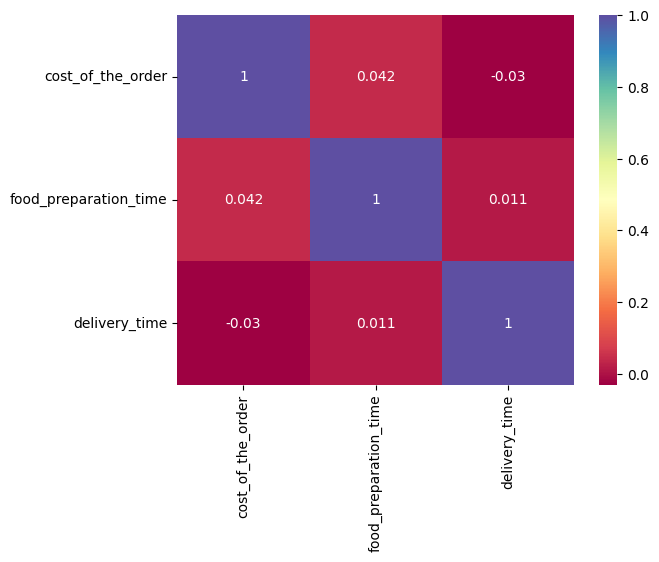

In [19]:
correl = df[['cost_of_the_order','food_preparation_time', 'delivery_time']].corr()

sns.heatmap(correl, annot=True, cmap="Spectral");

Observation: There is no correlation between cost_of_the_order and food_preparation_time or delivery_time

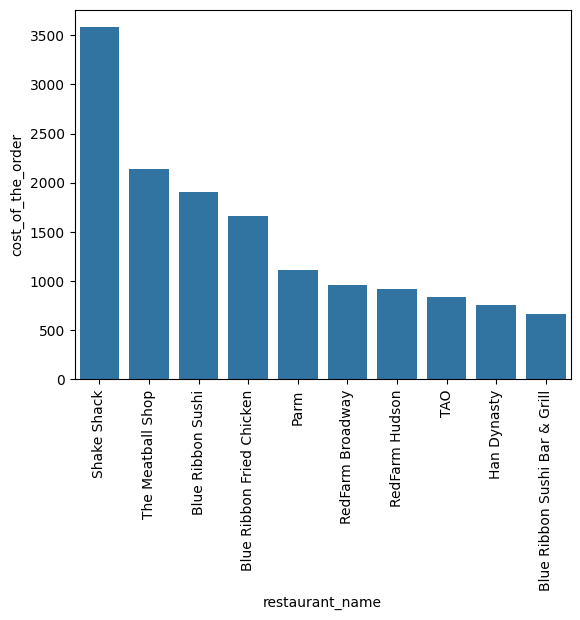

In [20]:
top10_rest_sales= df.groupby('restaurant_name').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10) #top 10 states producing maximum honey
top10_rest_sales
sns.barplot(data=top10_rest_sales, x='restaurant_name', y='cost_of_the_order')
plt.xticks(rotation=90);


Observations:
Top 10 restaurants based on the sales

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [21]:
# Write the code here
#remove the orders with no rating
df_with_rating = df[df['rating'] != 'Not given'].copy()
#convert the rating column to integer
#df_with_rating['int_rating']=
df_with_rating['rating']=df_with_rating['rating'].astype(int)

#idenfify all the restaurants with rating count > 50 and then find all the restaurants whose average rating >4
df_with_rating.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50).groupby(['restaurant_name']).filter(lambda x: x['rating'].mean() > 4).groupby('restaurant_name')['rating'].mean()




,rating
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


#### Observations:
#There are few orders that aren't rated, so I removed those orders from the scope of this analysis. Created a copy of the dataset in a new dataframe.
#Since the ratings are in String format, I had to convert them to numeric (int) values
# I had to filter only the restaurants who got more than 50 ratings.
# I noticed all the restaurants who got more than 50 rating have average rates of more than 4 already.
# To be sure, I applied the extra check to make sure we are seeing only the restaurants with minimum average rating of 4.
# Based on my observations, the restaurants serving more order have better ratings.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [22]:
# Write the code here

df.shape[0]
print('Total number of Orders: '+str(df.shape[0]))
print('Number of Orders having cost more than $20: '+str(df[df['cost_of_the_order']>20].shape[0]))
print('Number of Orders having cost between 5 & 20: '+str(df[df['cost_of_the_order'].between(5,20)].shape[0]))
#df[df['cost_of_the_order']<=5].shape[0] - 9



df.loc[df['cost_of_the_order']>20, 'cost_of_the_order'].sum()*0.25+df.loc[(df['cost_of_the_order'].between(5,20)), 'cost_of_the_order'].sum()*0.15


Total number of Orders: 1898
Number of Orders having cost more than $20: 555
Number of Orders having cost between 5 & 20: 1334


6166.303

#### Observations:
#There are very few order with cost less than 5, so there is not much of revenue with these orders.
#More than 1/3rd of the orders cost more than 20 dollars.
#More than half o the orders cost between 5 and 20 dollars.
#Based on the given orders data, the company's net income (revenue) is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [23]:
# Write the code here
df['total_time'] = df['delivery_time']+df['food_preparation_time']
print('Total number of orders: '+str(df['total_time'].count())) #1898

#Identify the relationship between the cost of order and total_time

print('Number of orders took more than 60 mins: '+str(df[df['total_time']>60]['total_time'].count())) #200
print('Number of orders took less than 60 mins: '+str(df[df['total_time']<=60]['total_time'].count()))
print('Percentage of Orders took more than 60 mins: '+str(df[df['total_time']>60].shape[0]/df.shape[0]*100))



Total number of orders: 1898
Number of orders took more than 60 mins: 200
Number of orders took less than 60 mins: 1698
Percentage of Orders took more than 60 mins: 10.537407797681771


#### Observations:
#There are around 200 out of 1898 orders took longer than 60 mins to prep and deliver the food from the time the order is placed.
#It's only about 10.5% of the orders took longer than 60 mins.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [24]:
# Write the code here

df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
# The average delivery times on weekends is 22.47
# The avarega delivery times on weekdays is 28.34
# The week days delivery time seems to be longer than a week end delivery
# The company needs to take the day_of_the_week into account while estimating the order delivery time.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
# There are more orders on the weekends.
# The cost of weekend orders are higher than weekday orders.
# American cuisine is ordered the most.
# Weekday deliveries take longer than weekends.
# Many orders are not rated by the customers.


### Recommendations:
# The company needs to take the day_of_the_week into account to accurately estimate the order delivery time.
# Hire more drivers and the cooks on the weekends.
# Encourage/remind customers to rate their order


---